## MCB112 
Yining Hua, pset 3

### 1. downsample the data set by reservoir sampling
Write a script that takes a random sample of 10 data (non-comment) lines, using the [reservoir sampling algorithm](http://mcb112.org/w03/w03-homework.html).

In [1]:
! head -10 w03-data.tbl

# Supplementary Data Table 1
# From Lestrade et al., "The adventure of the missing phenotype", Sand Mouse Journal 1:3 (2021)
#
#                   wt     wt     wt     wt     wt     wt     wt     wt     wt     wt    mut    mut    mut    mut    mut    mut    mut    mut    mut    mut
# gene_name          M      M      F      F      F      F      M      M      M      F      M      M      F      F      M      F      M      F      F      M
anise             50.7   54.0   25.3   20.1   23.2   21.7   54.9   54.0   47.4   26.5   53.1   38.3   50.1   51.5   46.8   35.4   29.3   34.3   30.8   19.9
apricot           17.6   17.7   46.3   46.4   46.9   49.3   16.4   14.2   15.4   47.3   25.4   44.1   21.8   11.3   16.4   15.8   41.2   23.5   41.4   42.4
artichoke         71.4   70.6   42.5   43.6   40.1   42.8   72.5   72.1   71.6   42.7   67.2   38.7   52.5   60.1   71.3   65.0   65.8   63.3   64.9   27.9
arugula           42.2   44.0   70.4   69.8   72.4   72.8   47.8   39.1   38.0   70.2   65.2 

In [2]:
! head -10 w03-data.tbl

# Supplementary Data Table 1
# From Lestrade et al., "The adventure of the missing phenotype", Sand Mouse Journal 1:3 (2021)
#
#                   wt     wt     wt     wt     wt     wt     wt     wt     wt     wt    mut    mut    mut    mut    mut    mut    mut    mut    mut    mut
# gene_name          M      M      F      F      F      F      M      M      M      F      M      M      F      F      M      F      M      F      F      M
anise             50.7   54.0   25.3   20.1   23.2   21.7   54.9   54.0   47.4   26.5   53.1   38.3   50.1   51.5   46.8   35.4   29.3   34.3   30.8   19.9
apricot           17.6   17.7   46.3   46.4   46.9   49.3   16.4   14.2   15.4   47.3   25.4   44.1   21.8   11.3   16.4   15.8   41.2   23.5   41.4   42.4
artichoke         71.4   70.6   42.5   43.6   40.1   42.8   72.5   72.1   71.6   42.7   67.2   38.7   52.5   60.1   71.3   65.0   65.8   63.3   64.9   27.9
arugula           42.2   44.0   70.4   69.8   72.4   72.8   47.8   39.1   38.0   70.2   65.2 

So in short, we are gonna skip lines with "#"s, which are comments.

In [3]:
m = 10
sample = [""]*m

In [4]:
import random as rand
from tqdm import tqdm

rand.seed(666)

with open("w03-data.tbl","r") as file:
    i = 0 
    for _, line in enumerate(tqdm(file)):
        if line[0]!= "#":
            if i < m:
                sample[i] = line
                i += 1
            else:
                rand_i = rand.randint(1, i+1)
                if rand_i <= m:
                    sample[rand_i-1] = line
                i += 1

sample
        
        

20036it [00:00, 503846.58it/s]


['AC104581.1        77.7   77.1   48.1   51.3   52.4   50.1   78.5   77.4   76.4   49.3   63.5   56.6   60.7   42.2   58.6   71.3   70.4   40.5   45.0   65.4\n',
 'SURF4             50.4   50.2   78.6   77.0   79.4   78.8   49.8   47.9   49.9   80.3   90.9   76.7   52.4   79.2   36.8   84.7   52.5   80.4   77.5   48.1\n',
 'GAPDH             56.4   58.8   25.9   27.7   29.7   27.7   57.6   56.7   58.5   31.8   49.7   54.8   42.6   46.4   52.0   45.8   49.0   62.0   19.1   45.5\n',
 'BDNF              26.7   26.8   51.5   58.9   56.0   52.9   26.7   26.9   26.4   53.4   15.0   35.0   51.7   51.1   49.6   24.7   48.6   32.0   30.3   27.8\n',
 'FEZ2              54.8   51.9   82.6   79.8   79.4   81.1   50.8   51.7   53.0   77.8   91.4   70.4   80.2   68.6   44.0   40.2   51.2   83.2   31.3   58.0\n',
 'SPAG7             27.2   27.2   52.9   58.1   49.5   56.5   27.3   33.9   24.0   59.2   42.2   51.1   63.0   49.2   37.9   31.0   27.3   26.2   31.5   30.1\n',
 'FAM86C1           18.8   2

So our result gives essentially genes with different initial letters, except for "s", which we have 2: 
1. SURF4
2. SPAG7

Let's see if it actually worked by using Pandas sort the pool andtake a random sample?

In [41]:
import pandas as pd
df = pd.read_csv("w03-data.tbl", delim_whitespace = True, header=None, comment="#")
df.columns = [s for s in "gene_name          M      M      F      F      F      F      M      M      M      F      M      M      F      F      M      F      M     F      F      M".split(" ") if s]
df = df.sort_values(by="gene_name", key=lambda col: col.str.lower())
df

,gene_name,M,M,F,F,F,F,M,M,M,...,M,M,F,F,M,F,M,F,F,M
19250,A1BG,61.5,62.9,32.9,35.1,36.2,38.8,65.4,65.0,63.6,...,39.0,23.0,49.9,41.3,55.3,62.6,67.5,66.3,46.1,42.6
11844,A1CF,52.6,54.2,82.5,78.9,85.5,82.2,54.6,52.5,53.9,...,64.6,64.1,63.8,62.4,61.1,89.4,73.7,63.5,85.8,37.0
12472,A2M,30.0,26.4,62.1,60.4,60.1,58.3,32.6,33.5,30.5,...,38.8,63.0,56.9,41.2,44.9,66.9,15.4,32.8,45.5,10.5
12468,A2ML1,61.1,57.3,29.7,29.5,29.6,32.2,52.5,57.4,56.6,...,43.7,39.9,24.0,28.6,32.2,44.8,67.4,64.9,27.6,44.6
567,A3GALT2,44.1,42.4,75.0,70.1,79.5,73.2,47.0,48.1,46.0,...,66.3,90.4,39.3,65.8,37.0,57.7,69.1,27.0,57.4,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,ZYG11A,64.8,63.9,33.2,30.7,35.0,36.7,62.3,64.7,67.3,...,25.8,52.0,51.6,46.9,46.9,71.7,74.2,44.8,40.0,63.6
795,ZYG11B,50.5,48.4,21.4,20.6,22.4,19.3,46.2,49.7,50.3,...,48.9,29.6,37.3,34.8,22.8,29.7,30.1,44.1,26.1,25.7
7945,ZYX,53.0,55.8,80.1,84.9,83.2,83.0,58.1,52.5,54.2,...,82.0,74.7,58.0,77.2,46.1,57.4,62.2,48.6,82.2,64.2
15863,ZZEF1,71.1,71.8,40.2,44.4,42.5,44.5,75.9,75.3,70.9,...,52.6,59.9,55.7,68.3,71.7,67.8,35.7,70.3,60.3,56.5


So the genes are named from A to Z

In [42]:
df.sample(10)

,gene_name,M,M,F,F,F,F,M,M,M,...,M,M,F,F,M,F,M,F,F,M
16690,TUBD1,29.9,37.3,63.8,65.4,64.6,62.9,37.0,38.4,32.2,...,44.9,46.4,53.7,58.8,28.6,56.0,30.5,49.6,59.9,59.6
12512,TAS2R14,49.1,45.3,22.0,18.0,19.3,16.5,48.8,47.4,45.5,...,14.8,25.8,37.8,28.1,47.3,28.1,47.3,54.0,51.2,43.9
2564,LOXL3,49.4,59.1,76.9,80.1,80.2,79.0,49.7,50.4,49.7,...,34.1,76.7,78.1,52.3,57.1,60.5,61.7,90.3,96.8,82.1
8194,CFAP47,71.6,71.9,42.4,43.8,44.5,45.8,70.6,70.7,72.8,...,65.7,48.5,57.8,67.5,51.2,53.9,63.8,45.4,58.5,75.9
8750,MCF2,44.9,44.3,19.1,14.3,16.8,17.0,43.7,40.7,46.6,...,34.6,38.2,37.3,17.1,28.8,3.6,16.0,45.8,17.9,43.7
6424,DXO,27.2,27.8,53.8,56.8,54.6,56.3,26.5,28.1,26.8,...,51.0,39.4,37.4,40.4,37.1,29.7,65.0,52.4,42.8,43.5
16535,MAPT,45.1,49.0,72.0,75.7,74.9,72.8,44.5,45.8,46.6,...,58.5,60.8,46.6,54.9,68.4,70.5,81.0,50.9,52.8,39.8
6703,HMGCLL1,60.9,59.2,31.1,33.6,29.6,31.2,55.7,59.7,57.1,...,15.1,56.3,72.8,23.0,43.6,34.6,35.4,36.0,52.3,50.3
2611,KDM3A,49.8,52.6,80.6,80.2,85.9,84.8,49.2,50.0,54.6,...,85.2,47.0,91.2,73.4,36.2,96.7,60.7,56.5,87.7,58.5
8536,RAB40AL,52.2,49.5,23.4,21.0,20.0,21.6,47.6,53.1,50.4,...,29.9,38.3,28.0,50.3,58.3,16.7,42.6,33.9,44.3,34.7


About the same, except that pandas gave 2 genes with initial "C"s. Our sampling should be more random than what Pandas gave us?

### 2. look at outliers; validate the formatting; and clean the data
Write a script that checks over the whole file and:

- Find and print the data line that contains the maximum expression level.
- Find and print the data line that contains the minimum expression level.
- Find lines that don't have the right format. ("Right" is deliberately left vague. Validation is a creative art!)
Write a script that removes the data lines that have the problems you just detected.

(hint: there are two problems in the data file, affecting 35 data lines. Your cleaning should leave you with 19,996 data lines for that many sand mouse genes, not counting comment/header lines.)

In [43]:
## Will the problem be comments?
! grep "#" w03-data.tbl

# Supplementary Data Table 1
# From Lestrade et al., "The adventure of the missing phenotype", Sand Mouse Journal 1:3 (2021)
#
#                   wt     wt     wt     wt     wt     wt     wt     wt     wt     wt    mut    mut    mut    mut    mut    mut    mut    mut    mut    mut
# gene_name          M      M      F      F      F      F      M      M      M      F      M      M      F      F      M      F      M      F      F      M


Nope. Type float?

In [44]:
df.set_index(df.gene_name).drop("gene_name",axis=1).astype(float)

ValueError: could not convert string to float: 'n.d.'

There might be some problem with this "n.d."? Not defined? Let's force to convert the dataframe to float-typed and convert non-floats to np.nan

In [45]:
print("Original length: %i"%len(df))
df = df.set_index(df.gene_name).drop("gene_name",axis=1).apply(pd.to_numeric, errors="coerce", axis=1).dropna()
df

Original length: 20031


,M,M,F,F,F,F,M,M,M,F,M,M,F,F,M,F,M,F,F,M
gene_name,,,,,,,,,,,,,,,,,,,,
A1BG,61.5,62.9,32.9,35.1,36.2,38.8,65.4,65.0,63.6,41.0,39.0,23.0,49.9,41.3,55.3,62.6,67.5,66.3,46.1,42.6
A1CF,52.6,54.2,82.5,78.9,85.5,82.2,54.6,52.5,53.9,83.4,64.6,64.1,63.8,62.4,61.1,89.4,73.7,63.5,85.8,37.0
A2M,30.0,26.4,62.1,60.4,60.1,58.3,32.6,33.5,30.5,58.2,38.8,63.0,56.9,41.2,44.9,66.9,15.4,32.8,45.5,10.5
A2ML1,61.1,57.3,29.7,29.5,29.6,32.2,52.5,57.4,56.6,34.8,43.7,39.9,24.0,28.6,32.2,44.8,67.4,64.9,27.6,44.6
A3GALT2,44.1,42.4,75.0,70.1,79.5,73.2,47.0,48.1,46.0,73.4,66.3,90.4,39.3,65.8,37.0,57.7,69.1,27.0,57.4,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,64.8,63.9,33.2,30.7,35.0,36.7,62.3,64.7,67.3,35.3,25.8,52.0,51.6,46.9,46.9,71.7,74.2,44.8,40.0,63.6
ZYG11B,50.5,48.4,21.4,20.6,22.4,19.3,46.2,49.7,50.3,25.4,48.9,29.6,37.3,34.8,22.8,29.7,30.1,44.1,26.1,25.7
ZYX,53.0,55.8,80.1,84.9,83.2,83.0,58.1,52.5,54.2,81.8,82.0,74.7,58.0,77.2,46.1,57.4,62.2,48.6,82.2,64.2


One problem solved. Check if there's any value below 0?

In [46]:
def neg_to_nan(x):
    if x<0:
        return None
    return x 

df = df.applymap(neg_to_nan).dropna()
df

,M,M,F,F,F,F,M,M,M,F,M,M,F,F,M,F,M,F,F,M
gene_name,,,,,,,,,,,,,,,,,,,,
A1BG,61.5,62.9,32.9,35.1,36.2,38.8,65.4,65.0,63.6,41.0,39.0,23.0,49.9,41.3,55.3,62.6,67.5,66.3,46.1,42.6
A1CF,52.6,54.2,82.5,78.9,85.5,82.2,54.6,52.5,53.9,83.4,64.6,64.1,63.8,62.4,61.1,89.4,73.7,63.5,85.8,37.0
A2M,30.0,26.4,62.1,60.4,60.1,58.3,32.6,33.5,30.5,58.2,38.8,63.0,56.9,41.2,44.9,66.9,15.4,32.8,45.5,10.5
A2ML1,61.1,57.3,29.7,29.5,29.6,32.2,52.5,57.4,56.6,34.8,43.7,39.9,24.0,28.6,32.2,44.8,67.4,64.9,27.6,44.6
A3GALT2,44.1,42.4,75.0,70.1,79.5,73.2,47.0,48.1,46.0,73.4,66.3,90.4,39.3,65.8,37.0,57.7,69.1,27.0,57.4,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,64.8,63.9,33.2,30.7,35.0,36.7,62.3,64.7,67.3,35.3,25.8,52.0,51.6,46.9,46.9,71.7,74.2,44.8,40.0,63.6
ZYG11B,50.5,48.4,21.4,20.6,22.4,19.3,46.2,49.7,50.3,25.4,48.9,29.6,37.3,34.8,22.8,29.7,30.1,44.1,26.1,25.7
ZYX,53.0,55.8,80.1,84.9,83.2,83.0,58.1,52.5,54.2,81.8,82.0,74.7,58.0,77.2,46.1,57.4,62.2,48.6,82.2,64.2


Wow!\
Now max and min. 

In [47]:
print("Max expression(s) at row(s): ")
indices = df.max(axis=1)
df_max = df[indices == indices.max()]
df_max

Max expression(s) at row(s): 


,M,M,F,F,F,F,M,M,M,F,M,M,F,F,M,F,M,F,F,M
gene_name,,,,,,,,,,,,,,,,,,,,
AC105009.1,84.0,81.6,51.2,55.0,50.2,51.2,77.9,78.4,84.5,52.0,65.2,50.0,125.4,68.9,56.7,50.5,63.5,45.7,76.7,57.0


Actually the min value seems to be 0. But there should be more than 1 0s. Let's check.

In [48]:
print("Min expression(s) at row(s): ")
indices = df.min(axis=1)
df_min = df[indices==indices.min()]
df_min

Min expression(s) at row(s): 


,M,M,F,F,F,F,M,M,M,F,M,M,F,F,M,F,M,F,F,M
gene_name,,,,,,,,,,,,,,,,,,,,
ABC13-47488600E17.1,47.7,45.1,19.2,17.2,17.1,21.5,50.5,46.8,44.4,16.1,22.2,42.4,53.7,45.3,21.3,28.6,61.5,0.0,10.4,36.4
ABCA13,45.8,44.9,17.6,17.0,16.5,18.9,45.8,45.4,44.6,17.2,37.3,29.2,33.7,40.0,0.0,27.0,10.2,34.3,36.3,34.0
ABCC6,43.7,44.0,18.7,18.4,17.0,15.2,47.1,47.7,46.9,19.5,54.1,41.8,0.0,18.5,45.1,53.8,20.2,24.6,5.3,53.5
ABCC9,16.6,14.4,48.6,46.9,44.5,51.3,17.2,19.5,23.9,48.5,0.0,34.5,35.0,62.1,44.1,19.7,52.2,35.4,18.2,5.8
ABHD10,49.6,52.9,21.2,27.5,25.0,19.3,50.9,52.4,50.2,21.9,73.9,50.3,34.8,36.0,51.9,0.0,42.6,44.8,40.3,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF600,22.9,19.4,47.7,49.1,53.6,49.6,20.2,22.6,22.4,50.8,24.8,32.2,32.6,28.9,62.4,53.5,49.0,0.0,91.1,8.1
ZNF678,59.2,60.0,28.1,27.0,34.1,34.2,58.3,60.0,59.8,28.7,0.0,57.6,56.9,53.8,30.7,27.6,49.3,45.7,67.8,36.6
ZNF770,44.8,48.3,16.5,18.2,18.6,15.2,47.4,45.2,44.5,20.0,42.0,12.9,0.0,33.0,34.2,32.2,17.2,24.8,41.1,28.1


### 3. tidy the data
Write a script that converts the data table to a new file in tidy [data format](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf).

Both Pandas and Seaborn (which we're about to use next) are happiest with tidy data.



In [59]:
df = df.T.reset_index()
df.insert(0,"sex",df.pop("index"))
df.insert(0,"genotype",['wt','wt','wt','wt','wt','wt','wt','wt','wt','wt','mut','mut','mut','mut','mut','mut','mut','mut','mut','mut'])
df.to_csv("tidy_data.csv", index=False)
df = pd.read_csv("tidy_data.csv")
df

,genotype,sex,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,wt,M,61.5,52.6,30.0,61.1,44.1,45.3,80.0,34.1,...,48.7,62.7,83.3,43.4,53.2,64.8,50.5,53.0,71.1,43.7
1,wt,M,62.9,54.2,26.4,57.3,42.4,43.1,80.7,33.2,...,49.7,66.2,82.2,43.8,52.2,63.9,48.4,55.8,71.8,43.2
2,wt,F,32.9,82.5,62.1,29.7,75.0,19.3,56.2,61.6,...,79.0,38.6,53.8,11.2,24.0,33.2,21.4,80.1,40.2,14.2
3,wt,F,35.1,78.9,60.4,29.5,70.1,16.6,53.6,60.9,...,76.4,36.3,54.3,15.1,21.5,30.7,20.6,84.9,44.4,21.3
4,wt,F,36.2,85.5,60.1,29.6,79.5,18.2,50.1,61.3,...,73.5,38.0,52.1,14.0,19.3,35.0,22.4,83.2,42.5,16.8
5,wt,F,38.8,82.2,58.3,32.2,73.2,13.4,57.4,63.1,...,72.1,40.4,49.5,15.3,22.8,36.7,19.3,83.0,44.5,15.5
6,wt,M,65.4,54.6,32.6,52.5,47.0,50.3,78.6,32.6,...,49.7,61.2,80.9,43.6,50.1,62.3,46.2,58.1,75.9,48.4
7,wt,M,65.0,52.5,33.5,57.4,48.1,48.0,83.9,32.6,...,47.6,62.3,79.1,44.6,50.2,64.7,49.7,52.5,75.3,46.2
8,wt,M,63.6,53.9,30.5,56.6,46.0,46.3,82.5,30.5,...,45.4,62.5,80.0,44.7,52.0,67.3,50.3,54.2,70.9,44.0
9,wt,F,41.0,83.4,58.2,34.8,73.4,18.7,52.9,62.8,...,80.3,39.8,52.8,13.6,29.8,35.3,25.4,81.8,45.5,20.0


Let's get data into long data format

In [64]:
df.insert(0,"gene",df.reset_index().pop("index"))
df

,gene,genotype,sex,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,wt,M,61.5,52.6,30.0,61.1,44.1,45.3,80.0,...,48.7,62.7,83.3,43.4,53.2,64.8,50.5,53.0,71.1,43.7
1,1,wt,M,62.9,54.2,26.4,57.3,42.4,43.1,80.7,...,49.7,66.2,82.2,43.8,52.2,63.9,48.4,55.8,71.8,43.2
2,2,wt,F,32.9,82.5,62.1,29.7,75.0,19.3,56.2,...,79.0,38.6,53.8,11.2,24.0,33.2,21.4,80.1,40.2,14.2
3,3,wt,F,35.1,78.9,60.4,29.5,70.1,16.6,53.6,...,76.4,36.3,54.3,15.1,21.5,30.7,20.6,84.9,44.4,21.3
4,4,wt,F,36.2,85.5,60.1,29.6,79.5,18.2,50.1,...,73.5,38.0,52.1,14.0,19.3,35.0,22.4,83.2,42.5,16.8
5,5,wt,F,38.8,82.2,58.3,32.2,73.2,13.4,57.4,...,72.1,40.4,49.5,15.3,22.8,36.7,19.3,83.0,44.5,15.5
6,6,wt,M,65.4,54.6,32.6,52.5,47.0,50.3,78.6,...,49.7,61.2,80.9,43.6,50.1,62.3,46.2,58.1,75.9,48.4
7,7,wt,M,65.0,52.5,33.5,57.4,48.1,48.0,83.9,...,47.6,62.3,79.1,44.6,50.2,64.7,49.7,52.5,75.3,46.2
8,8,wt,M,63.6,53.9,30.5,56.6,46.0,46.3,82.5,...,45.4,62.5,80.0,44.7,52.0,67.3,50.3,54.2,70.9,44.0
9,9,wt,F,41.0,83.4,58.2,34.8,73.4,18.7,52.9,...,80.3,39.8,52.8,13.6,29.8,35.3,25.4,81.8,45.5,20.0


In [75]:
long_data = pd.melt(df, id_vars=["genotype", "sex"], value_vars=df.loc[:, "A1BG":], var_name="gene",
            value_name="TPM")
long_data

,genotype,sex,gene,TPM
0,wt,M,A1BG,61.5
1,wt,M,A1BG,62.9
2,wt,F,A1BG,32.9
3,wt,F,A1BG,35.1
4,wt,F,A1BG,36.2
...,...,...,...,...
399915,mut,F,ZZZ3,19.4
399916,mut,M,ZZZ3,54.1
399917,mut,F,ZZZ3,35.0
399918,mut,F,ZZZ3,39.3


That's it.

### 4. visualize the data and explain your conclusions
Write a script to read your tidy data file and visualize the distribution of the raw data points using beeswarm plots (also known as swarm plots) -- that is, 20 points per gene, 10 biological replicates for wild type versus mutant -- for any list of chosen sand mouse genes, and use it to display a plot of 10 randomly sampled genes. The Seaborn package has [a good swarm plot function](http://seaborn.pydata.org/generated/seaborn.swarmplot.html)... which is why we're using Seaborn.

Also have a look at Seaborn's [catplot function](http://seaborn.pydata.org/generated/seaborn.catplot.html) too (i.e. a categorical plot, which they used to call a factor plot), which gives you the ability to plot lots of genes in a "facet grid" in the same figure.

Instead of a swarm plot, another way to do it (which I might actually prefer, now that I've been playing with it for a while) is a Seaborn [strip plot](http://seaborn.pydata.org/generated/seaborn.stripplot.html) with jitter=True.

(Helpful side note: we're only introducing you a wee bit to data plotting this week. Learning Pandas in some depth is the bigger goal. If you aren't familiar with Matplotlib or Seaborn for plotting, that's fine -- don't start reading their manuals or tutorials yet. Instead, skip to the "massive hint" below. All you're really going to have to do here is take a [working Seaborn script](http://mcb112.org/w03/w03-boxplot.py) and figure out how to get it to plot what you want.)

What's going on in the Coriander mutant?

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the gene names as a list
rand_sample = rand.sample(list(df.columns)[3:], 10)
dat = long_data.loc[long_data["gene"].isin(rand_sample)]

In [82]:
dat.TPM = dat.TPM.astype(float)

/opt/homebrew/anaconda3/envs/biling/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='genotype', ylabel='TPM'>

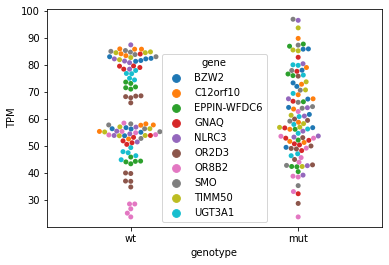

In [89]:
sns.swarmplot(x="genotype", y="TPM",hue="gene", data=dat)

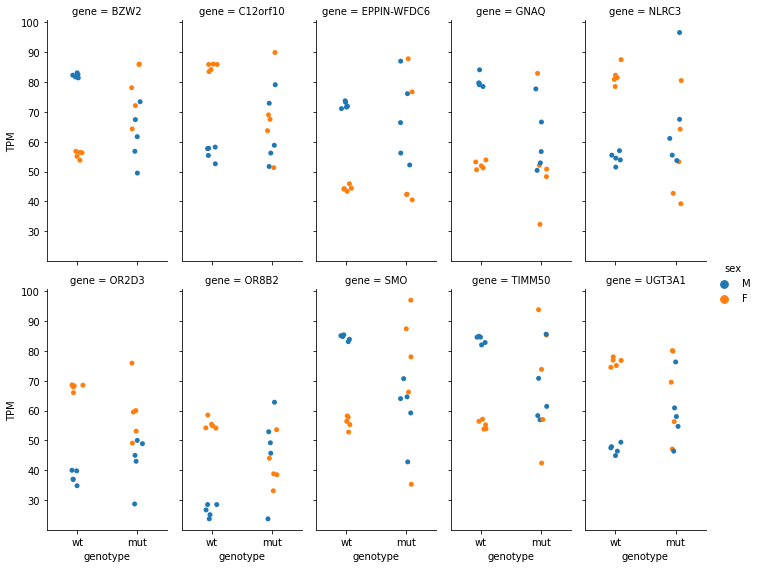

In [90]:
sns.catplot(x="genotype",y="TPM",data=dat, hue='sex', col="gene", 
            col_wrap=5,height=4, aspect=0.5,kind="strip")

It seems messy, but we can observe clear sex-difference-based clusterings in the expression levels among the wild mice. This is different to the case of mutant sand mice.
We can seperate them to have a clear view:

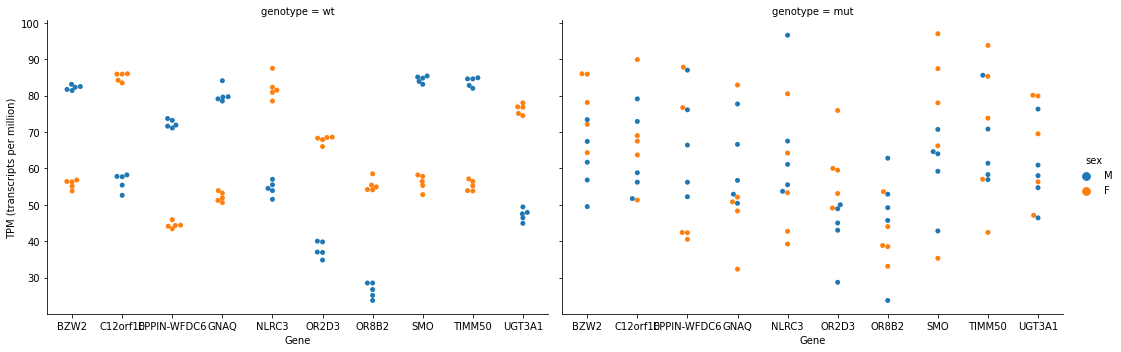

In [105]:
g = sns.catplot(x="gene", y="TPM", col="genotype", hue="sex", data=dat, kind="swarm", height=5, aspect=1.5)
g.set_axis_labels("Gene", "TPM (transcripts per million)")
    

#### Let's have a look at the target genes

/opt/homebrew/anaconda3/envs/biling/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


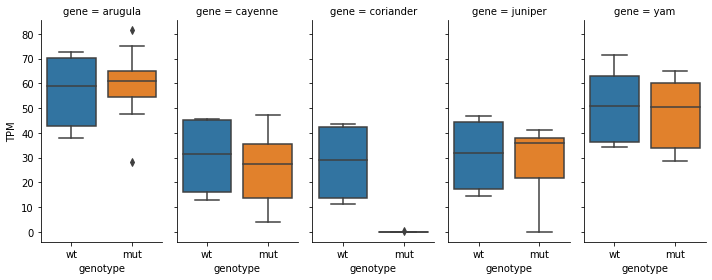

In [99]:
## select our genes of interest
target_genes = ['arugula','cayenne','coriander','juniper', 'yam']
df_coriander = long_data.loc[long_data['gene'].isin(target_genes)]
df_coriander.TPM = df_coriander.TPM.astype(float)
plt = sns.catplot(x="genotype",y="TPM", col="gene", col_wrap=5,
                data=df_coriander,height=4, aspect=0.5,
                kind="box")

Hmmm looks similar to the results of Lestrade. Let's hae a look at the swarm plot?

<AxesSubplot:xlabel='genotype', ylabel='TPM'>

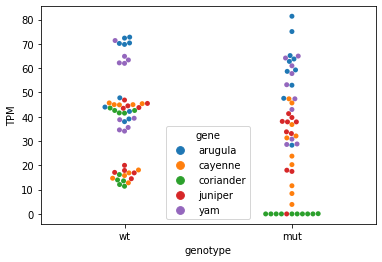

In [103]:
sns.swarmplot(x="genotype", y="TPM",hue="gene", data=df_coriander)

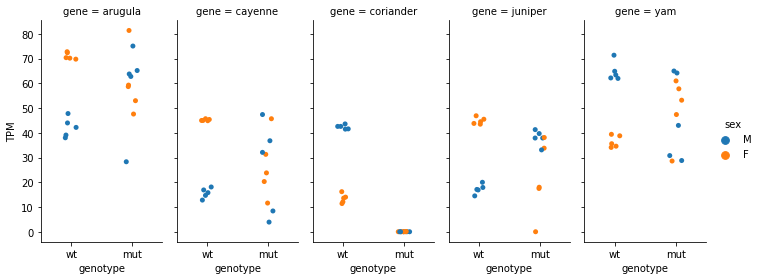

In [101]:
sns.catplot(x="genotype",y="TPM",data=df_coriander, hue='sex', col="gene", 
            col_wrap=5,height=4, aspect=0.5,kind="strip")

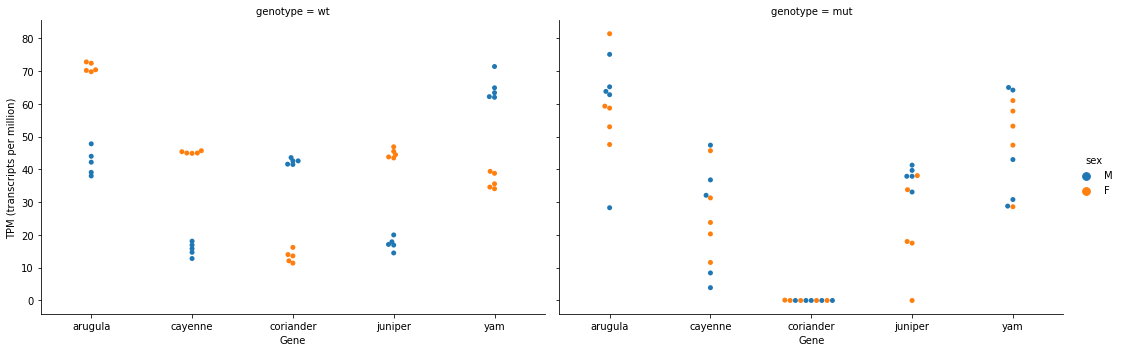

In [106]:
g = sns.catplot(x="gene", y="TPM", col="genotype", hue="sex", data=df_coriander, kind="swarm", height=5, aspect=1.5)
g.set_axis_labels("Gene", "TPM (transcripts per million)")

So again, highly sex-oriented differences in the 5 genes of interest among wild-type mice, but relatively mild clustring in mutant sand mice. The absence of Coriander probably caused the differnece between the wild type and the mutants. 